In [1]:
from google.cloud import storage
import argparse
import gzip
import os
import sys
import time
from multiprocessing import Pool

import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from utils import gcs_utils as gcs
from utils import model_and_evaluate_cluster as ev
import urllib.parse
import urllib.request

import io 

import importlib
import hdbscan
import networkx as nx 
import pickle

import obonet
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
b3_pairs = gcs.download_parquet(
    'model_outputs/no_cluster_size_limit/B3EP_A-HDBSCAN-CurveNet-all_protein_combos_per_cluster.parquet')

b3 = b3_pairs[['query_protein', 'cluster']].drop_duplicates()
b3.rename(columns={'query_protein':'protein'}, inplace=True)
b3 = b3_pairs.pivot_table(index=['cluster'],
              values='query_protein',
              aggfunc=[pd.Series.nunique, len]).reset_index()
b3.columns=['cluster', 'num_proteins', 'num_pairs']

In [46]:
c3.shape

(3947, 3)

In [31]:
c3_pairs = gcs.download_parquet(
    'model_outputs/no_cluster_size_limit/C3EP_B-OPTICS-Novel-COS-2-all_protein_combos_per_cluster.parquet')

c3 = c3_pairs[['query_protein', 'cluster']].drop_duplicates()
c3.rename(columns={'query_protein':'protein'}, inplace=True)
c3 = c3_pairs.pivot_table(index=['cluster'],
              values='query_protein',
              aggfunc=[pd.Series.nunique, len]).reset_index()
c3.columns=['cluster', 'num_proteins', 'num_pairs']

In [32]:
b3.shape

(833, 3)

In [35]:
c3.shape

(3947, 3)

In [43]:
b3.head()

,cluster,num_proteins,num_pairs
0,0,16,240
1,1,12,132
2,2,5,20
3,3,23,506
4,4,5,20


<AxesSubplot:xlabel='num_proteins', ylabel='Count'>

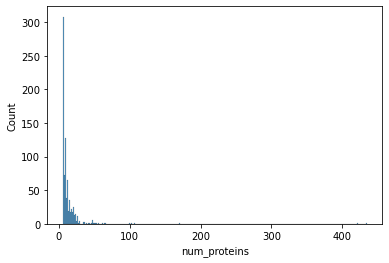

In [44]:
sns.histplot(data=b3, x="num_proteins")



In [45]:
b3.num_proteins.value_counts()[:10]

5     175
6     133
7      72
8      69
9      59
10     38
11     34
12     32
14     21
13     19
Name: num_proteins, dtype: int64

<AxesSubplot:xlabel='num_proteins', ylabel='Count'>

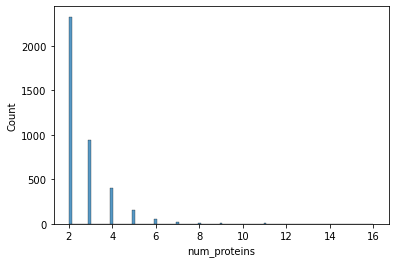

In [38]:
data = c3
sns.histplot(data=data, x="num_proteins")



In [41]:
c3.num_proteins.value_counts()[:10]

2     2327
3      945
4      399
5      160
6       60
7       25
8       14
9        7
11       5
13       2
Name: num_proteins, dtype: int64

Comparing B3-EP-A vs C3-EP-B

Cluster size: 
* B3epa cluster size 5+. And distribution is pretty even
* C3epb cluster size is 2+. Out of 4,000 cluster, over half of them have just two proteins. 

<AxesSubplot:xlabel='protein', ylabel='Count'>

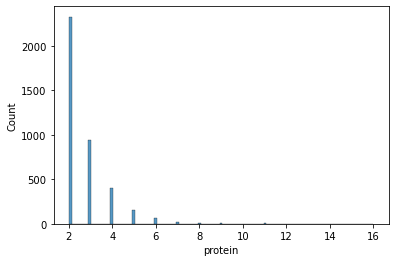

In [21]:
data = c3.pivot_table(index='cluster',
              values='protein',
              aggfunc=len)

sns.histplot(data=data, x="protein")



In [60]:
c3.num_pairs.sum()

23886

# overlapping proteins?

In [58]:
len(set(b3_pairs.query_protein).intersection(set(c3_pairs.query_protein)))

7391